In [1]:
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import time
import statistics
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage import exposure
import earthpy.spatial as es
import rasterio
from rasterio.plot import show
from tqdm.notebook import tqdm 
import math
from sklearn.metrics import silhouette_score 
from sklearn.datasets import make_blobs 
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


In [2]:
landsat='C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/'

In [3]:
landsat_paths = glob(os.path.join(landsat,"*_s*.TIF"))
print(landsat_paths)

['C:/Users/SHASANK DIXIT/Desktop/DST PROJECT\\madeira_S2_20240412_10m_CF_v2.tif', 'C:/Users/SHASANK DIXIT/Desktop/DST PROJECT\\_s.tif']


In [4]:
a=rxr.open_rasterio(landsat_paths[1],masked=False).squeeze()
a.values

array([[[2370, 2368, 2368, ..., 2176, 2173, 2173],
        [2370, 2368, 2368, ..., 2176, 2173, 2173],
        [2348, 2351, 2351, ..., 2179, 2173, 2173],
        ...,
        [2368, 2406, 2406, ..., 2460, 2437, 2437],
        [2488, 2496, 2496, ..., 2437, 2458, 2458],
        [2488, 2496, 2496, ..., 2437, 2458, 2458]],

       [[2043, 2095, 2214, ..., 1897, 1877, 1874],
        [1962, 2269, 2191, ..., 1905, 1899, 1889],
        [1961, 2122, 2040, ..., 1890, 1881, 1883],
        ...,
        [2020, 2159, 2110, ..., 2203, 2160, 2140],
        [2366, 2314, 2332, ..., 2175, 2166, 2116],
        [2275, 2318, 2364, ..., 2157, 2138, 2133]],

       [[1989, 2041, 2136, ..., 1864, 1862, 1829],
        [1891, 2250, 2164, ..., 1930, 1939, 1849],
        [1877, 2042, 1960, ..., 1892, 1898, 1885],
        ...,
        [1971, 2134, 2059, ..., 2107, 2124, 2086],
        [2320, 2428, 2442, ..., 2107, 2052, 2027],
        [2318, 2407, 2465, ..., 2082, 2108, 2046]],

       ...,

       [[1008, 1009, 100

In [5]:
img=a.values
img.shape

(13, 741, 1376)

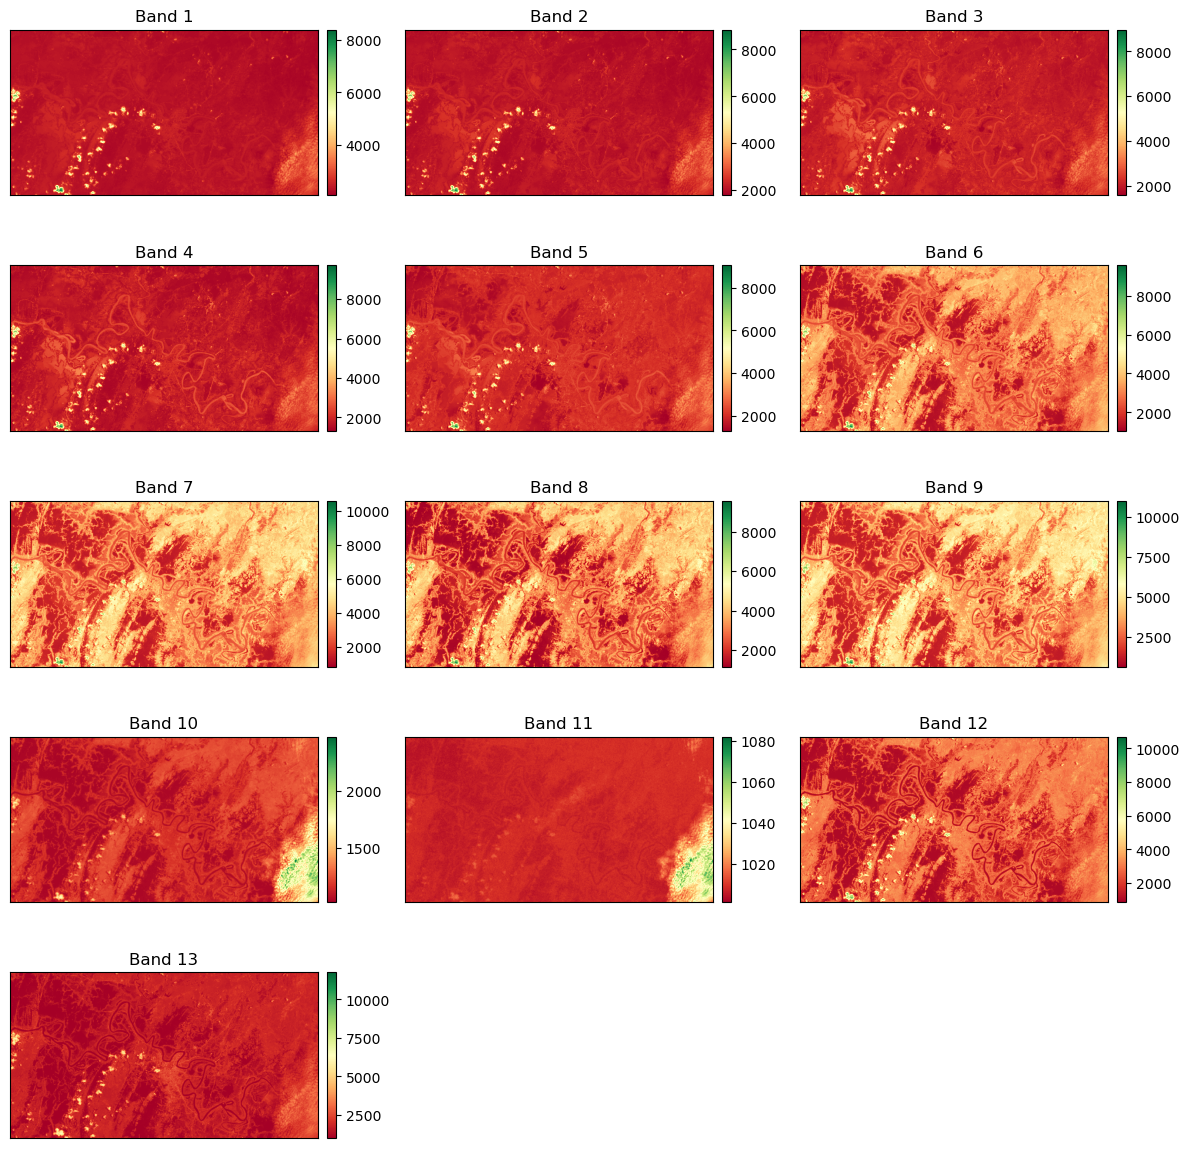

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>],
       [<Axes: title={'center': 'Band 4'}>,
        <Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>],
       [<Axes: title={'center': 'Band 7'}>,
        <Axes: title={'center': 'Band 8'}>,
        <Axes: title={'center': 'Band 9'}>],
       [<Axes: title={'center': 'Band 10'}>,
        <Axes: title={'center': 'Band 11'}>,
        <Axes: title={'center': 'Band 12'}>],
       [<Axes: title={'center': 'Band 13'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [6]:
ep.plot_bands(img, cmap="RdYlGn")

In [31]:
img=rasterio.plot.reshape_as_image(img)

In [32]:
img.shape

(741, 1376, 13)

In [33]:
band1=img[:,:,1]
band2=img[:,:,2]
band3=img[:,:,7]

In [11]:
band1.shape

(1376, 13)

In [34]:
img=np.stack((band1,band2,band3))
img.shape

(3, 741, 1376)

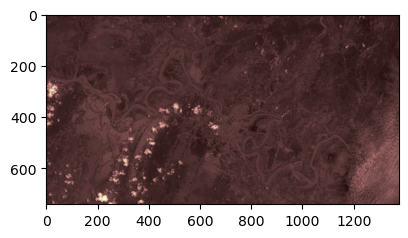

In [35]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(img[0,:,:],cmap='pink')

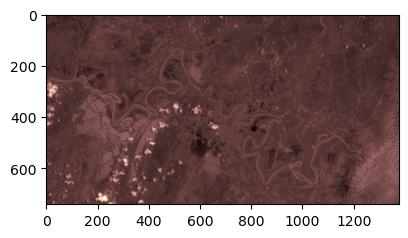

In [36]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(img[1,:,:],cmap='pink')

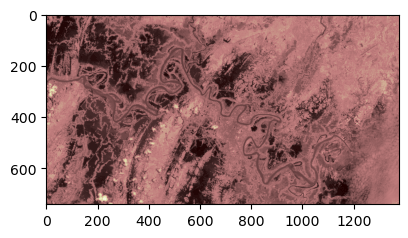

In [37]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(img[2,:,:],cmap='pink')

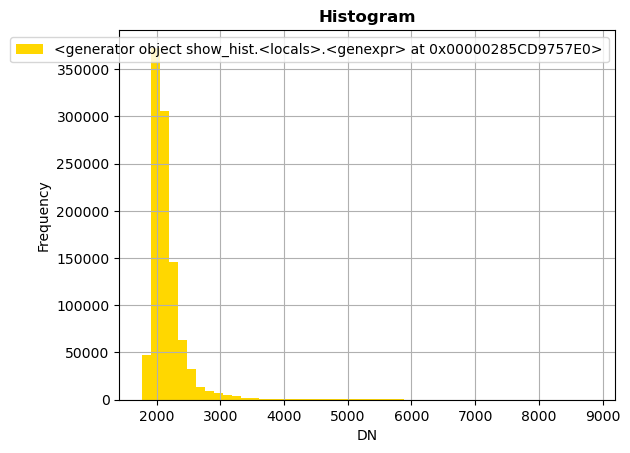

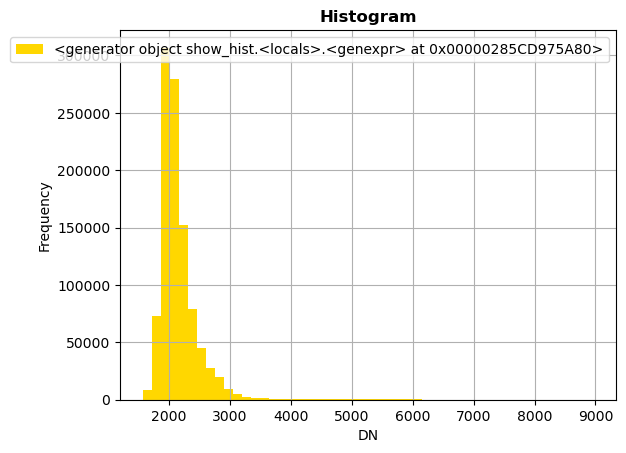

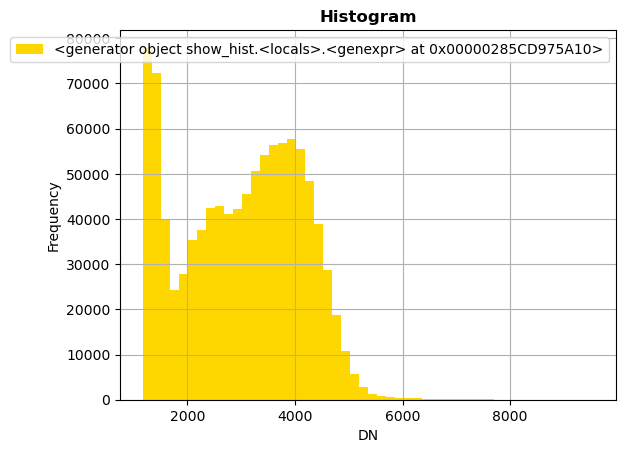

In [38]:
rasterio.plot.show_hist(img[0,:,:],bins=50,histtype='stepfilled',lw=0.0,stacked='False')
rasterio.plot.show_hist(img[1,:,:],bins=50,histtype='stepfilled',lw=0.0,stacked='False')
rasterio.plot.show_hist(img[2,:,:],bins=50,histtype='stepfilled',lw=0.0,stacked='False')

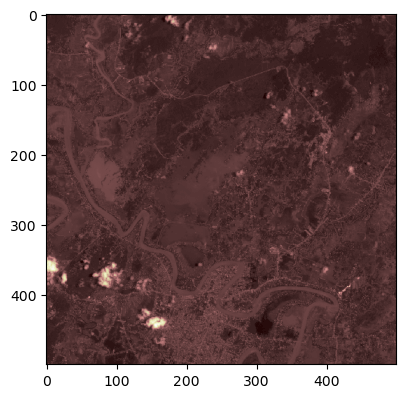

In [39]:
roi=img[:,0:500,500:1000]
roi.shape
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(roi[0,:,:],cmap='pink')

(500, 500, 3)
[[[0.12652389 0.13311367 0.60691928]
  [0.12421746 0.12388797 0.55716639]
  [0.12207578 0.12108731 0.5261944 ]
  ...
  [0.16705107 0.16375618 0.23031301]
  [0.17545305 0.17512356 0.18698517]
  [0.16622735 0.16062603 0.11680395]]

 [[0.12751236 0.13492586 0.62652389]
  [0.12784185 0.13525535 0.61713344]
  [0.12240527 0.12685338 0.60889621]
  ...
  [0.15304778 0.13706755 0.05172982]
  [0.15897858 0.14530478 0.06392092]
  [0.15518946 0.15074135 0.09126853]]

 [[0.12718287 0.13196046 0.62899506]
  [0.12701812 0.1306425  0.62257002]
  [0.12652389 0.13311367 0.62421746]
  ...
  [0.13459638 0.14003295 0.45667216]
  [0.12833608 0.1339374  0.58583196]
  [0.11812191 0.11663921 0.5616145 ]]

 ...

 [[0.1199341  0.10411862 0.37578254]
  [0.12059308 0.10444811 0.39670511]
  [0.11795717 0.09686985 0.26705107]
  ...
  [0.17644152 0.17495881 0.215486  ]
  [0.15799012 0.15140033 0.16293245]
  [0.15255354 0.15008237 0.18253707]]

 [[0.1169687  0.10197694 0.39802306]
  [0.11779242 0.1014827

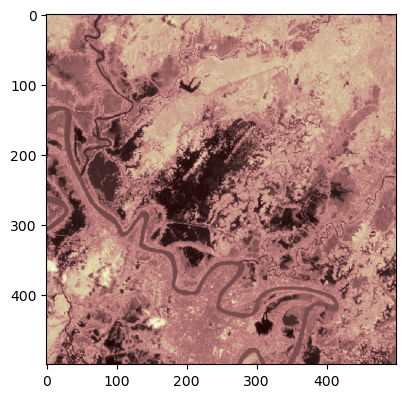

In [71]:
roi_updated=rasterio.plot.adjust_band(roi)
#ax1.imshow(roi_updated[:,:,0],cmap='pink')
roi_updated_1=rasterio.plot.reshape_as_image(roi_updated)
print(roi_updated_1.shape)
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(roi_updated_1[:,:,2],cmap='pink')
roi_updated_1.min()
print(roi_updated_1)

In [72]:
roi_updated_2=roi_updated_1.reshape(-1,3)
roi_updated_2=ma.getdata(roi_updated_2)
print(roi_updated_2.shape)
roi_updated_2[2]

(250000, 3)


array([0.12207578, 0.12108731, 0.5261944 ])

In [42]:
def dm(data, prototypes, k):
    centroid = np.mean(data)
    numerator = np.sqrt((data - prototypes[np.arange(len(data)) % k]) ** 2)
    #print(numerator)
    denominator = np.sqrt((data - centroid) ** 2)
    #print(denominator)
    return np.mean(numerator / denominator)

In [43]:
def sarrogate_model(data,dim):
    minimum=[]
    DE=[]
    proto=[]
    for i in range (2,100):
        prototypes=1*(np.random.ranf((i, i,dim)))
        proto.append(prototypes)
        var=np.array(prototypes)
        var=var.reshape(-1)
        #print(var)
        qe=np.mean(np.sqrt((data - var[np.arange(len(data)) % (i*i)]) ** 2))
        Distortion=dm(data,var,i*i)
        DE.append(Distortion)
        minimum.append(qe)
        
    ind1=min(DE)
    ind2=min(minimum)
    if(DE.index(ind1)>minimum.index(ind2)):
        return DE.index(ind1),proto
    else:
        return minimum.index(ind2),proto
#best_of_prototypes,wgt=sarrogate_model(roi_updated_2.reshape(-1),3)

In [44]:
size=[]
weights=[]
for i in range(0,10):
    best_of_prototypes,wgt=sarrogate_model(roi_updated_2.reshape(-1),3)
    size.append(best_of_prototypes+2)
#print(best_of_prototypes+2)
    weights.append(wgt[best_of_prototypes])
output_Map=max(size)
index_Map=size.index(output_Map)
weight_map=weights[index_Map]
print(output_Map)

7


In [47]:
size

[3, 5, 6, 2, 2, 9, 2, 4, 3, 14]

In [45]:
def sarrogate_model_K(data,dim):
    minimum=[]
    proto=[]
    for i in range (3,100):
        prototypes=1 * (np.random.ranf((i,1,dim)))
        proto.append(prototypes)
        var=np.array(prototypes)
        var=var.reshape(-1)
        #print(var)
        #TE=np.mean(np.sqrt((data - var[(np.arange(len(data)) % i + 1) % i]) ** 2))
        qe=np.mean(np.sqrt((data - var[np.arange(len(data)) % i]) ** 2))
        #DM=dm(data,var,i)
        minimum.append(qe)
    ind=min(minimum)
    X=proto[minimum.index(ind)]
    return minimum.index(ind),X

In [46]:
check=[]
proto=[]
for i in range(0,50): 
    best_of_K,final_wgt=sarrogate_model_K(roi_updated_2.reshape(-1),3)
    #print(final_wgt)
    output_k=best_of_K+3
    check.append(output_k)
    proto.append(final_wgt)
    #final_wgt=final_wgt[best_of_K]
output_k=statistics.mode(check)
ff=check.index(output_k)

In [47]:
final_w=proto[ff]

In [48]:
output_k

3

In [49]:
# Hyperparameter Initialization 
x, y = output_Map,output_Map     # dimensions of Map 
sigma = output_Map/2 # spread of neighborhood 
dimensions=3         #number of vectors
learning_rate = 0.7 # learning rate  
epochs=1500
K=output_k   #no of final prototype neurons
decay_parameter = epochs / 2   # decay parameter 

In [50]:
activation_map1 = np.zeros((x, y)) 
activation_map2 = np.zeros((x, y)) 
final_cluster = np.zeros((K,1))
print(final_cluster)

[[0.]
 [0.]
 [0.]]


In [51]:
weights1 = weight_map 
weights2 = weight_map 
print(weights1)
#weights=weights/weights.max()
#print(weights.max())
final_weights = final_w
final_weights

[[[0.90762142 0.78470894 0.20999906]
  [0.52211669 0.3271104  0.45395156]
  [0.42698308 0.80182518 0.31449981]
  [0.54414372 0.49061552 0.0311201 ]
  [0.3793627  0.12551457 0.16854851]
  [0.84837435 0.54566288 0.47490917]
  [0.406812   0.88494422 0.4235847 ]]

 [[0.27077863 0.31581676 0.48143801]
  [0.43379028 0.28228983 0.45126825]
  [0.27047639 0.05801075 0.73555259]
  [0.05137028 0.05721107 0.28600714]
  [0.62015149 0.28968676 0.85287538]
  [0.23979341 0.27774972 0.02472736]
  [0.70339144 0.77493515 0.48939821]]

 [[0.1408306  0.65112039 0.40038258]
  [0.9129064  0.53534063 0.61340859]
  [0.76417438 0.86166387 0.84807083]
  [0.71309479 0.8346925  0.39661369]
  [0.9202257  0.5557019  0.03864119]
  [0.01653797 0.85314013 0.6894752 ]
  [0.20797563 0.2439991  0.24240359]]

 [[0.57488246 0.7919336  0.81790424]
  [0.86360502 0.75753082 0.35773874]
  [0.65646018 0.96373793 0.31493674]
  [0.82404399 0.2979076  0.23302379]
  [0.57088347 0.82681911 0.13221278]
  [0.5463238  0.17981192 0.54623

array([[[0.4194313 , 0.26475734, 0.19675706]],

       [[0.18163396, 0.87775415, 0.72490576]],

       [[0.17753852, 0.37394105, 0.10320372]]])

In [52]:
# Define Neighborhood Region 
neighbour_x = np.arange(x) 
neighbour_y = np.arange(y) 
neighbour_x1 = np.arange(K)
neighbour_y1 = np.arange(1)
print(neighbour_x1)

[0 1 2]


In [65]:
def decay_learning_rate_sigma(iteration): 
    learning_rate_ = learning_rate/(1 + iteration / decay_parameter) 
    sigma_ = sigma / (1 + iteration / decay_parameter) 
    return learning_rate_, sigma_ 

In [64]:
# Function: to get winner neuron 
def get_winner_neuron_1(x): 
    s = np.subtract(x, weights1) # x - w 
    #print(s)
    #print(s.shape)
    it = np.nditer(activation_map1, flags =['multi_index']) 
    #print(it)
    #print(it.shape)
    while not it.finished: 
        # || x - w || 
        activation_map1[it.multi_index] = np.linalg.norm(s[it.multi_index])   
        it.iternext() 
    
    #print(activation_map)
    return np.unravel_index(activation_map1.argmin(), activation_map1.shape) 
#x=get_winner_neuron([[0.5,0.6,0.7,0.8]])
#print(x)

In [57]:
# Function: to get winner neuron 
def get_winner_neuron_2(x): 
    s = np.subtract(x, weights2) # x - w 
    #print(s)
    #print(s.shape)
    it = np.nditer(activation_map2, flags =['multi_index']) 
    #print(it)
    #print(it.shape)
    while not it.finished: 
        # || x - w || 
        activation_map2[it.multi_index] = np.linalg.norm(s[it.multi_index])   
        it.iternext() 
    
    #print(activation_map)
    return np.unravel_index(activation_map2.argmin(), activation_map2.shape) 
#x=get_winner_neuron([[0.5,0.6,0.7,0.8]])
#print(x)

In [58]:
def get_final_clusters(x):
    s = np.subtract(x, final_weights) # x - w 
    #print(s.shape)
    it = np.nditer(final_cluster, flags =['multi_index']) 
    while not it.finished: 
        # || x - w || 
        final_cluster[it.multi_index] = np.linalg.norm(s[it.multi_index])   
        it.iternext() 
  
    return np.unravel_index(final_cluster.argmin(), final_cluster.shape) 

In [59]:
# Update weights 
def update_weights_1(win_neuron, inputx, iteration): 
  # decay learning rate and sigma 
    learning_rate_, sigma_ = decay_learning_rate_sigma(iteration) 
  
  # get neighborhood about winning neuron (Mexican hat function) 
    d = 2 * np.pi * (sigma_**2) 
    ax = np.exp(-1 * np.square(neighbour_x - win_neuron[0]) / d) 
    ay = np.exp(-1 * np.square(neighbour_y - win_neuron[1]) / d) 
  
    neighborhood = np.outer(ax, ay) 
    #print(neighborhood)
    it = np.nditer(neighborhood, flags = ['multi_index']) 
    while not it.finished: 
        weights1[it.multi_index] += learning_rate_ * neighborhood[it.multi_index] * (inputx - weights1[it.multi_index]) 
        it.iternext() 
        #print(weights.shape)
    return weights1

In [60]:
# Update weights 
def update_weights_2(win_neuron, inputx, iteration): 
  # decay learning rate and sigma 
    learning_rate_, sigma_ = decay_learning_rate_sigma(iteration) 
  
  # get neighborhood about winning neuron (Mexican hat function) 
    d = 2 * np.pi * (sigma_**2) 
    ax = np.exp(-1 * np.square(neighbour_x - win_neuron[0]) / d) 
    ay = np.exp(-1 * np.square(neighbour_y - win_neuron[1]) / d) 
  
    neighborhood = np.outer(ax, ay) 
    #print(neighborhood)
    it = np.nditer(neighborhood, flags = ['multi_index']) 
    while not it.finished: 
        weights2[it.multi_index] += learning_rate_ * neighborhood[it.multi_index] * (inputx - weights2[it.multi_index]) 
        it.iternext() 
        #print(weights.shape)
    return weights2

In [61]:
# Update weights 
def update_weights_final(win_neuron, inputx, iteration): 
  # decay learning rate and sigma 
    learning_rate_, sigma_ = decay_learning_rate_sigma(iteration) 
  
  # get neighborhood about winning neuron (Mexican hat function) 
    #d = 2 * np.pi * (sigma_**2) 
    ax = np.exp(-1 * np.square(neighbour_x1 - win_neuron[0])) 
    ay = np.exp(-1 * np.square(neighbour_y1 - win_neuron[1])) 
  
    neighborhood = np.outer(ax, ay) 
    #print(neighborhood)
    it = np.nditer(neighborhood, flags = ['multi_index']) 
    #print(it.shape)
    while not it.finished: 
        final_weights[it.multi_index] += learning_rate_ * neighborhood[it.multi_index] * (inputx - final_weights[it.multi_index]) 
        it.iternext() 
        #print(final_weights.shape)
    return final_weights

In [62]:
def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        #print(point)
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            #global c
            #print(i)
            manhattan_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                manhattan_dist += dist
            manhattan_dist = np.sqrt(manhattan_dist)
            if nearest_center_dist == None:
                nearest_center_dist = manhattan_dist
                nearest_center = i
            elif nearest_center_dist > manhattan_dist:
                nearest_center_dist = manhattan_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

import numpy as np
from scipy.spatial.distance import cdist

def cluster_dispersion_indicator(data, labels):
    # Calculate centroids
    centroids = np.array([data[labels == i].mean(axis=0) for i in np.unique(labels)])

    # Calculate cluster dispersion
    cluster_disp = cdist(data, centroids).min(axis=1).mean()
    labels = labels.astype(int)
    # Calculate overall dispersion
    overall_disp = np.take(cdist(data, centroids), labels, axis=0).mean()

    # Calculate CDI
    cdi = overall_disp / cluster_disp
    return cdi


In [63]:
# Training model: Learning Phase 
start=time.time()
def som_clustering(roi_updated_2,data,epochs,k):
    for epoch in tqdm(range(1, epochs + 1)): 
        np.random.shuffle(roi_updated_2) 
        idx1 = np.random.randint(0, roi_updated_2.shape[0]) 
        idx2 = np.random.randint(0, roi_updated_2.shape[0]) 
        #print(idx)

        #first layer
        win_neuron_1 = get_winner_neuron_1(roi_updated_2[idx1]) 
        win_neuron_2 = get_winner_neuron_2(roi_updated_2[idx2])
        #print(win_neuron)
        updated_weights_1=update_weights_1(win_neuron_1, roi_updated_2[idx1], epoch)
        updated_weights_2=update_weights_2(win_neuron_2, roi_updated_2[idx2], epoch)

        #second Layer
        updated_weights_1=updated_weights_1.reshape(-1,3)
        updated_weights_2=updated_weights_2.reshape(-1,3)
        weights_3=(updated_weights_1 + updated_weights_2)/2
        np.random.shuffle(weights_3) 
        idx3 = np.random.randint(0, weights_3.shape[0])
        #print(idx1)
        final_winning_neuron= get_final_clusters(weights_3[idx3])
        #print(final_winning_neuron)
        z=update_weights_final(final_winning_neuron, weights_3[idx3], epoch)
       
        fw=final_weights.reshape(-1,3).tolist()
        x=point_clustering(data.tolist(),fw,3,True)
        #LT.append
        final=np.array(x)
        X=final.reshape(500,500,4)
        clustered_image=X[:,:,3]
        uu=clustered_image.reshape(-1)
        #cdi=cluster_dispersion_indicator(data,uu)
        #db=davies_bouldin_score(data,uu)
        db=calinski_harabasz_score(data,uu)
        proto=z.reshape(-1)
       # print(db)
        global previous_value 
        global ww
        
        
        #current_value = dm(data.reshape(-1),proto,k)
        #if db<0.7:
            #ss=silhouette_score(data,uu)
            #if(ss>0.5):
                #previous_value=db
                #ww=fw
                #break
        if abs(round(db,-2) - round(previous_value,-2)) == 0:
            previous_value=db
            ww=fw
            break
        elif db > previous_value:
            previous_value=db
            ww=fw
        #previous_value = current_value
        print(db)
        if epoch == 1 or epoch == 100 or epoch == 200 or epoch==1000 or epoch==1500 or epoch==5000 or epoch==10000: 
            plot_x = [] 
            plot_y = [] 

            for i in range(final_weights.shape[0]): 
                for j in range(final_weights.shape[1]): 
                    plot_x.append(final_weights[i][j][0]) 
                    plot_y.append(final_weights[i][j][1]) 

            plt.title('After ' + str(epoch) + ' iterations') 
            plt.scatter(plot_x, plot_y, c = 'r') 
            plt.show() 
            plt.close() 
            #return z
end=time.time()
print(end-start)

0.0010733604431152344


  0%|          | 0/1500 [00:00<?, ?it/s]

11735.546058824431


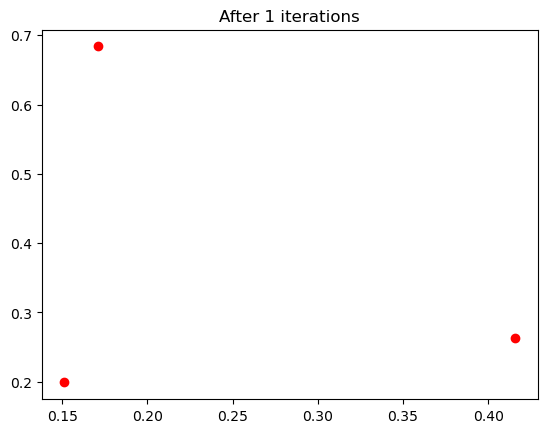

10958.211705831927
15247.688583870317
21184.906123624227
17519.90243527511
195506.96265132373
198438.9068700164
200005.46587577584
233135.0804468393
242885.88637286276
231160.8631309186
238736.25688265366
225273.1655295701
262378.0392356774
260323.45685152747
223977.79233556482
227439.22084499593
194755.02376956976
167390.77439501067
136857.90262780146
101815.12536376595
85910.70450726137
107446.09764349087
229305.22062026238
249653.5891400383
248865.72135102906
258205.86689397454
252262.2989632653
324766.0109888974
290839.4714782369
333859.847665282
335585.27557334525
321676.12310136016
328210.85708236817
327707.33650547755
346358.5275581438
303600.8807086131
342689.80271954497
349240.8772043949
339976.53788753727
344385.1003433659
328273.0622866065
295948.534496586
292308.6258794468
296380.85316780413
274231.914364757
235886.55160153174
227968.474425748
239572.4006883976
221271.69009692158
206322.3545208207
194015.04359035383
198489.79140424592
240188.48995030887
320041.44735445816
2

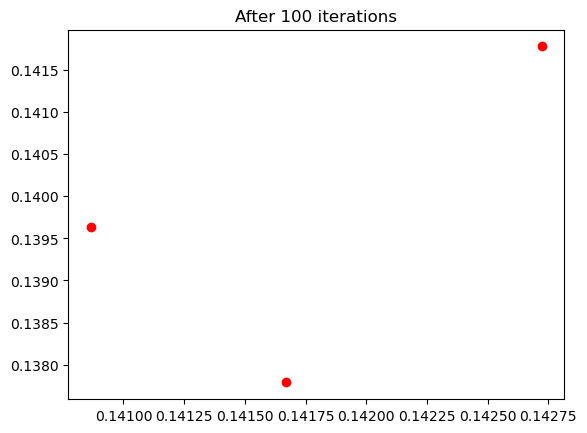

299401.0616063144
284597.07462265843
369186.5599583925
329046.78368388163
301204.41112092725
273898.9445631224
269056.58087957854
277212.48126885673
275063.2186621282
263280.1627658271
241866.538131832
235395.67780462955
260990.13178038833
310462.50118788524
335084.7875717649
331840.45488260395
314650.1348056819
326806.1517350609
338318.01879814523
361478.4379743873
335934.8239215751
314945.8757043047
283791.2860677355
265639.4706991705
250962.63798210453
272649.44271744427
295646.3142723609
305517.66224090575
297531.4962636767
289111.7399568212
336572.26414811856
318476.73902346496
334700.7969393401
387572.60625408095
380412.4480708892
339187.8249081642
304431.86961878196
282628.4486990441
277678.6058256547
276884.27465957426
266366.89843878103
254131.46207806785
246892.54672108355
232375.4287395024
226728.3673474965
205693.07543375745
191638.98433070735
170705.71859692712
188340.39704274325
180474.02160101532
174826.84790872215
180446.5689622284
248081.16881717232
250502.15461999224


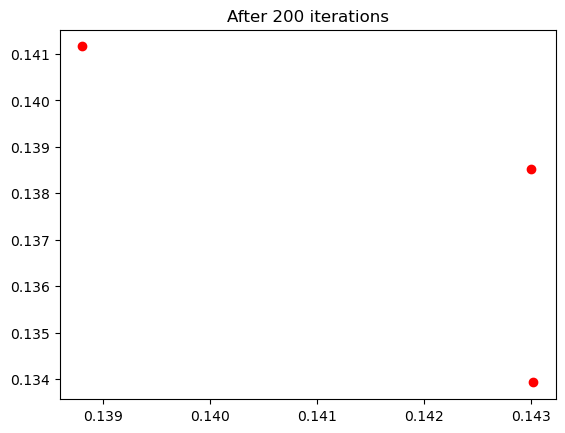

292198.17024116544
260964.0345743155
265238.12255642965
323642.03889814357
359606.62643098255
313312.7566246544
325640.38046478556
316741.5046280172
326108.4396814615
323088.8155521173
317353.3559962609
296851.26556457864
298585.9504073679
289159.7826803099
286639.14068101696
267667.8639062438
259458.13644639117
244301.65031718247
228634.24900087976
282248.4582516729
276835.6704451517
279243.9688608581
244778.00125697622
238460.7450811957
229284.6380927172
252938.1997663996
349800.0483346041
317113.3565224546
300860.8088885574
282278.3783846647
284769.7849393114
299812.05369648297
279534.89674472477
264977.3680337642
267548.0441187677
267128.08267396194
262110.25965256413
289348.8159111327
304682.393203536
286504.0820701917
266409.0559491942
283329.931337375
330103.28110831755
328245.9965474803
311089.9170155684
297697.1485070926
296322.6458696278
293209.0927859053
339137.44113904017
345654.110016191
332943.73492185253
316179.6171746386
334468.2290074502
313962.00490807137
311961.42963

279939.99732583767
283609.89915536565
273643.3267351664
278778.8283417904
279757.7286917191
279601.33347737096
270963.6072804908
267275.63263083436
276988.2777471647
282176.8155004157
292869.1775288354
291157.7156393153
280422.41490291664
272182.4428487701
279459.1357425582
282244.0077359693
295827.72384148795
289840.0250864787
312039.25601805607
296124.4704845058
293606.2693243201
288858.37138178176
284651.40131226287
278532.08126346616
236003.2273531796
238115.10099183564
308279.75250885036
294957.862404799
300847.6737396946
301267.7665276199
308805.13637417805
316014.92048091715
302478.5093725762
291128.0973391015
302417.61685576965
297381.33246178424
311522.4277994152
324148.8444864749
323390.4340167956
331754.3885784504
325426.5936806186
316418.60907138226
328621.59835899627
327915.9835333743
312945.9587234645
305944.65216586855
301722.83018426487
307567.99843599787
287694.4722441991
275032.69572801207
269632.68042347755
294040.4126153683
292284.90812098427
282318.9972053851
32435

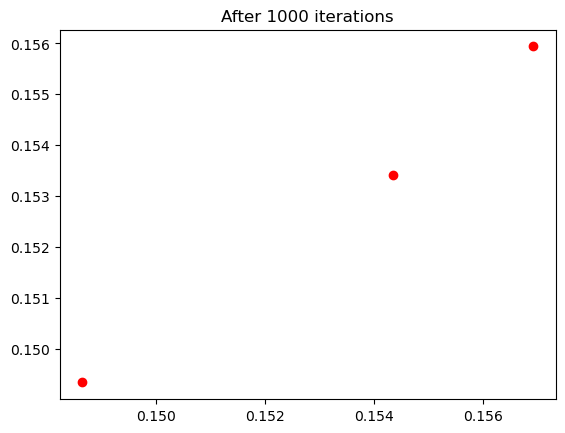

327878.98421557323
321813.02956482297
316393.9339639909
317608.70662729634
341901.51057908335
352178.8164933702
358448.3590295042
350768.80595190456
348166.6511550865
335151.21707539103
336071.4541276683
321577.78728858446
311547.5536872347
322302.70807398995
330598.60653490206
328579.6207153594
323274.511650871
317616.062259128
323641.4097487755
315430.7561338471
341607.0202612116
326229.78465487616
308495.3105653935
301816.36488676874
293110.298450006
291383.0838179858
285852.3445038214
283022.55446874397
276243.6615222452
271298.12371992524
287331.7665795432
299213.93486510386
302936.5707092584
294960.9989040231
301936.6953053701
289697.04360880156
299989.90158481686
298009.97667647095
311771.44890931266
333018.4074405666
333204.0942400532
343110.1610733873
320397.6019460385
314507.7795901415
307368.1887972874
303177.04122719145
316910.6143390478
311520.17982693994
306563.01445360185
308715.34434270475
304393.91279702325
283735.2412712599
278480.62180878076
274822.33821962937
270949

316121.58742785914
311726.8132762067
297460.3850375904
303218.82690020715
305102.5050970226
299748.9072839414
323005.8125227338
348834.8293911119
334325.7924126456
326688.67035565746
320687.79554574273
338895.8286910356
340395.4317279535
338839.33385078306
343331.87723535736
322043.2875447622
325288.19263853016
322704.1739587275
323600.1534858904
325394.4683448963
329070.1287875738
307653.1249107964
307053.18245282315
308135.59052381135
304051.3912944767
298041.45200172276
291676.80285212235
307507.25778142986
294316.68737625686
291285.6137360007
293080.66607994883
296367.2016885934
283213.8810525534
279352.27572796174
283010.37689704564
280644.85531791777
273431.64243440103
269114.414968718
259521.0462020826
267383.8368764828
263778.76470736915
262624.41756455525
257213.19337143246
255337.92252647734
252710.91070018068
246018.96682790763
243672.2633518189
242163.2416050555
266952.1007097734
295632.5447544791
285887.58828321716
286449.07371529


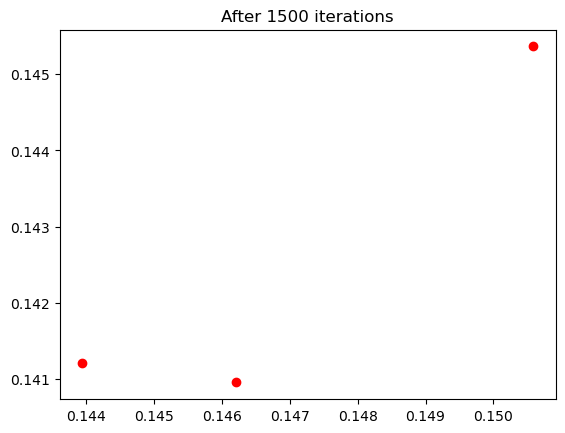

In [66]:
previous_value=1
DB_Score=[]
ww=None
som_clustering(roi_updated_2,roi_updated_2,1500,K)

In [67]:
previous_value

387572.60625408095

In [68]:
ww

[[0.1673698872198753, 0.16889966633418216, 0.4275835797087013],
 [0.1564983829704837, 0.15432310494659496, 0.32830190274877485],
 [0.13991359851972024, 0.13315556373318718, 0.15278155921353098]]

In [ ]:
def clustering(data, k=2, epochs=5):
    dims = len(data[0])
    print('data[0]:',data[0])
    centers = random_centers(dims,k)
    
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)
    
    return centers

In [147]:
ww=np.array(ww)
fw=ww.reshape(-1,3)
var=final_weights.reshape(-1).tolist()
std_data=statistics.stdev(var)
std_data

0.046641192164495734

In [148]:
def merge_centroids(centroids, threshold):
    num_centroids = len(centroids)
    min_dist = float('inf')
    min_idx = (-1, -1)

    # Find the closest pair of centroids
    for i in range(num_centroids):
        for j in range(i+1, num_centroids):
            dist = np.linalg.norm(centroids[i] - centroids[j])
            if dist < min_dist:
                min_dist = dist
                min_idx = (i, j)

    # If the closest pair is within the threshold, merge them
    if min_dist < threshold:
        avg_centroid = (centroids[min_idx[0]] + centroids[min_idx[1]]) / 2
        centroids = np.delete(centroids, min_idx, axis=0)
        centroids = np.append(centroids, [avg_centroid], axis=0)
        centroids = merge_centroids(centroids, threshold)
    return centroids

# Example usage

optimal_centroids = merge_centroids(fw, std_data)
print(optimal_centroids)


[[0.17992296 0.18093298 0.13549826]
 [0.49071357 0.22523763 0.4159438 ]
 [0.26005463 0.12122031 0.30984008]]


In [149]:
statistics.stdev(optimal_centroids.reshape(-1))

0.12679549379286623

In [69]:
x=np.array(ww)
x=x.reshape(-1,3)

cluster_head=[]
cluster_head2=[]
for i in range(0,x.shape[0]):
    cluster_head.append(x[i].mean()*255)
    cluster_head2.append(x[i])
#print(x[:,0] * 255)
#print(x[:,0].mean() * 255)
#print(x[:,1].mean() * 255)
#print(x[:,2].mean() * 255)
#print(x[:,3].mean() * 255)

In [70]:
#print(cluster_head)
length_of_centroids=len(cluster_head2)
print(length_of_centroids)
print(cluster_head2)
print(cluster_head)

3
[array([0.16736989, 0.16889967, 0.42758358]), array([0.15649838, 0.1543231 , 0.3283019 ]), array([0.1399136 , 0.13315556, 0.15278156])]
[64.92751632733449, 54.32548820659755, 36.197311324647266]


In [189]:
blue_band_centroids = []
for i in range(0,length_of_centroids):
    blue_band_centroids.append(cluster_head2[i][0])
print(blue_band_centroids)
green_band_centroids = []
for i in range(0,length_of_centroids):
    green_band_centroids.append(cluster_head2[i][1])
print(green_band_centroids)
red_band_centroids = []
for i in range(0,length_of_centroids):
    red_band_centroids.append(cluster_head2[i][2])
print(red_band_centroids)
nir_band_centroids = []
for i in range(0,length_of_centroids):
    nir_band_centroids.append(cluster_head2[i][3])
print(nir_band_centroids)

[0.074107132480991, 0.06381599526152834, 0.10299977801021927, 0.2371168011991793, 0.2997229092166585]
[0.13476575606393704, 0.12526592424889404, 0.158907302122049, 0.3002929102439576, 0.4896854065245175]
[0.12203065191925241, 0.11014614241793468, 0.1398687839275558, 0.29456333398697787, 0.46729171826267984]
[0.3072602072464114, 0.4631739245498356, 0.5169415122592793, 0.46420407770237626, 0.4577737146524833]


In [73]:
final=roi_updated_2
#channel2 = np.zeros((1000,1000))
#for i in final:
 #   print(final)
final=final.tolist()


In [74]:
x=point_clustering(final,cluster_head2,3,True)
x


[[0.12652388797364086, 0.13311367380560132, 0.6069192751235585, 0],
 [0.1242174629324547, 0.12388797364085667, 0.557166392092257, 0],
 [0.12207578253706755, 0.12108731466227347, 0.5261943986820429, 0],
 [0.12537067545304778, 0.12899505766062602, 0.6051070840197693, 0],
 [0.13031301482701813, 0.13591433278418452, 0.5963756177924218, 0],
 [0.13970345963756178, 0.14036243822075783, 0.44546952224052716, 0],
 [0.12767710049423395, 0.128665568369028, 0.4986820428336079, 0],
 [0.12009884678747941, 0.1158154859967051, 0.5217462932454695, 0],
 [0.12339373970345964, 0.11878088962108732, 0.513509060955519, 0],
 [0.12355848434925865, 0.12174629324546953, 0.5248764415156507, 0],
 [0.12059308072487644, 0.11729818780889621, 0.4957166392092257, 0],
 [0.12339373970345964, 0.12174629324546953, 0.4614497528830313, 0],
 [0.12471169686985173, 0.12751235584843493, 0.46540362438220756, 0],
 [0.12405271828665568, 0.1243822075782537, 0.5205930807248764, 0],
 [0.12405271828665568, 0.12685337726523888, 0.5326194

In [75]:
final=np.array(x)
final.shape


(250000, 4)

In [973]:
a,b,c,d,e=0,0,0,0,0
for i in range(0,1000000):
    if(x[i][3]==0):
        a+=1
    elif(x[i][3]==1):
        b+=1 
    elif(x[i][3]==2):
        c+=1
    elif(x[i][3]==3):
        d+=1
    #elif(x[i][4]==4):
        #e+=1
print(a,b,c,d)

205670 170699 338077 285554


In [385]:
for i in range(0,1000000):
    if(final[i][4]==0):
        for j in range(0,5):
            final[i][j]=1
    elif(final[i][4]==1):
        for j in range(0,5):
            final[i][j]=2
    elif(final[i][4]==2):
        for j in range(0,5):
            final[i][j]=3
    elif(final[i][4]==3):
        for j in range(0,5):
            final[i][j]=4
    elif(final[i][4]==4):
        for j in range(0,5):
            final[i][j]=5       

In [76]:
X=final.reshape(500,500,4)
X[:,:,3]

array([[0., 0., 0., ..., 1., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.]])

In [77]:
clustered_image=X[:,:,3]

[0.0, 1.0, 2.0]


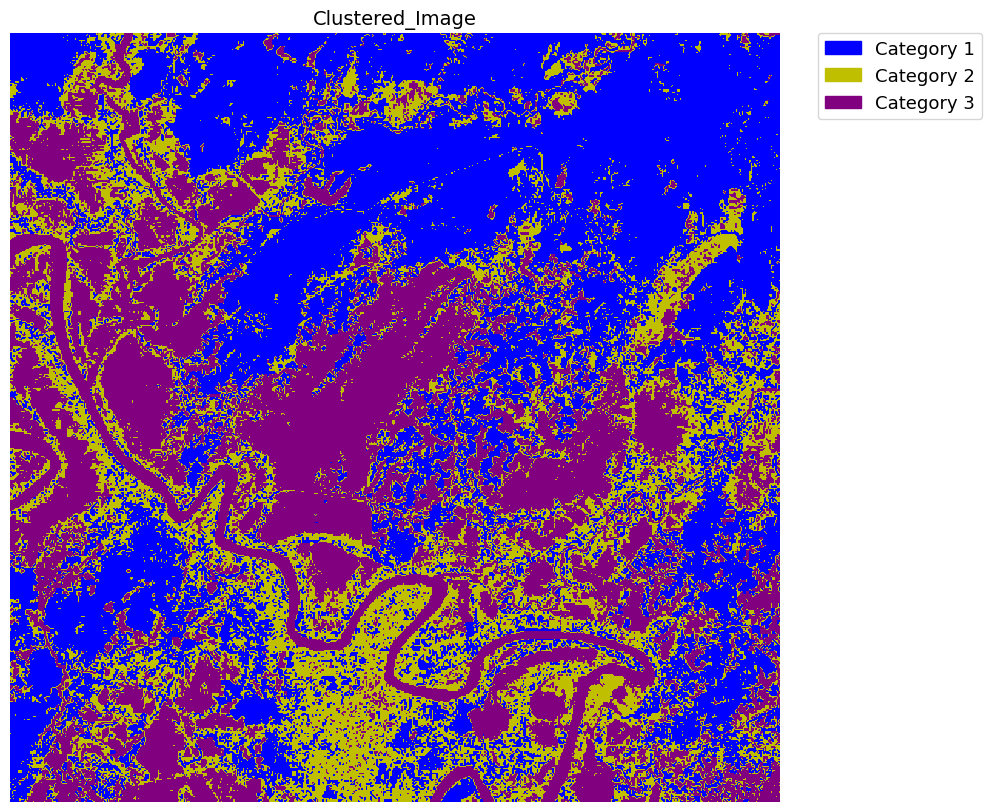

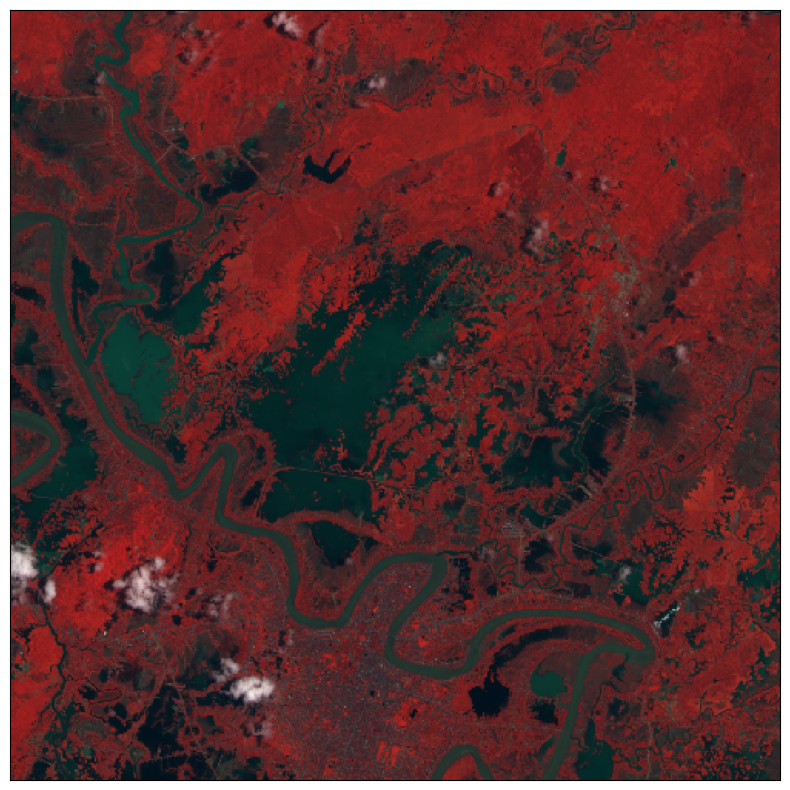

<Axes: >

In [78]:
from matplotlib.colors import ListedColormap
# Define color map
nbr_colors = ["blue","y","purple"]
#,"purple","white","green","darkgreen","gray","lightyellow","silver","darkblue","olive","magenta"
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "water bodies",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation"
    "Settlements",
    "Noise",
    
    
]

# Get list of classes
classes = np.unique(clustered_image)
classes = classes.tolist()
print(classes)
# The mask returns a value of none in the classes. remove that
# Plot your data
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(clustered_image, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes)
ax.set_title(
    "Clustered_Image",
    fontsize=14,
    
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()
ep.plot_rgb(roi,rgb=[2,1,0])

In [79]:
Y=roi_updated_2
z=clustered_image.reshape(-1)
Y=Y[0:1000000,:]
Y.shape
z=z[0:1000000]
z

array([0., 0., 0., ..., 2., 2., 2.])

In [81]:
v=[]
#v.append(ss)
u=[]
#u.append(db_score)




In [84]:
#ss=[]
v.append(silhouette_score(Y,z))

In [82]:
#db_score=[]
u.append(davies_bouldin_score(Y,z))


In [85]:

print(u)
print(v)

[0.7111301233507712]
[0.43973169570076936]


In [893]:
#Mean Squared Error (MSE)

import numpy as np



#Mean Absolute Error (MAE)

import numpy as np

def mae(data, prototypes, k):
    return np.mean(np.abs(data - prototypes[np.arange(len(data)) % k]))


#Quantization Error (QE)

import numpy as np

def qe(data, prototypes, k):
    return np.mean(np.sqrt((data - prototypes[np.arange(len(data)) % k]) ** 2))

def dm(data, prototypes, k):
    centroid = np.mean(data)
    numerator = np.mean(np.sqrt((data - prototypes[np.arange(len(data)) % k]) ** 2))
    #print(numerator)
    denominator = np.mean(np.sqrt((data - centroid) ** 2))
    #print(denominator)
    return numerator / denominator

In [891]:
mse_val=[]
mae_val=[]
qe_val=[]
dm_val=[]